# 载入工具

In [1]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(7)
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

# 读入数据

In [2]:
train_feature = pd.read_csv(os.path.join("D:\\Kaggle\\Xiamen_Bank", "train.csv"))
test_feature = pd.read_csv(os.path.join("D:\\Kaggle\\Xiamen_Bank", "test.csv"))

In [3]:
train_label = pd.read_csv(os.path.join("D:\\Kaggle\\Xiamen_Bank", "train_label.csv"))

## 探索分析

## 标签

In [4]:
train_label["id"].is_monotonic_increasing

True

### 分布

11

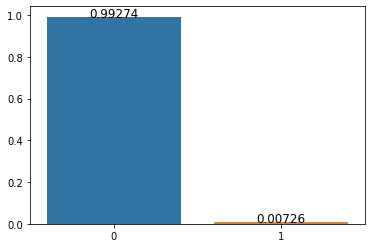

In [5]:
tmp = train_label["target"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

2180

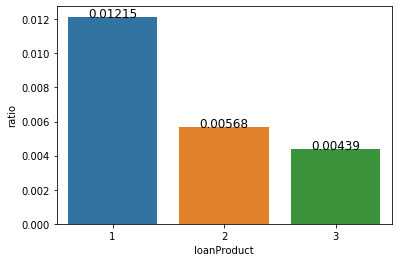

In [6]:
tmp = train_feature[["id", "loanProduct"]].merge(train_label[["id", "target"]])
tmp = tmp.groupby("loanProduct")["target"].mean().to_frame("ratio").reset_index()

_, ax = plt.subplots()
sns.barplot(x="loanProduct", y="ratio", ci=None, data=tmp, ax=ax)
for i, j in enumerate(tmp["ratio"]):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)
    
del tmp
gc.collect()

### 趋势

In [7]:
tmp = train_feature[["id", "loanProduct"]].merge(train_label[["id", "target"]])
tmp_1 = tmp.loc[tmp["loanProduct"] == 1, "target"].rolling(500).mean().dropna().reset_index(drop=True)
tmp_2 = tmp.loc[tmp["loanProduct"] == 2, "target"].rolling(500).mean().dropna().reset_index(drop=True)
tmp_3 = tmp.loc[tmp["loanProduct"] == 3, "target"].rolling(500).mean().dropna().reset_index(drop=True)

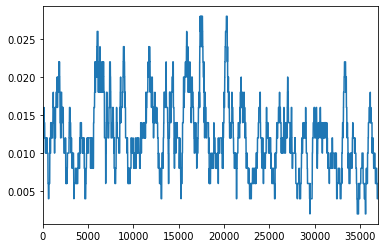

In [8]:
_, ax = plt.subplots()
tmp_1.plot(ax=ax)

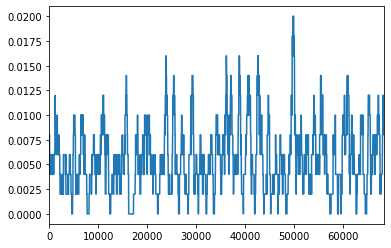

In [9]:
_, ax = plt.subplots()
tmp_2.plot(ax=ax)

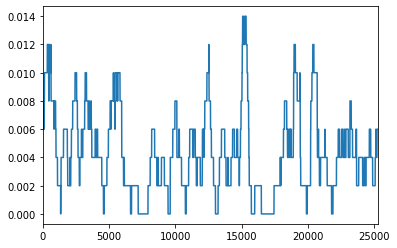

In [10]:
_, ax = plt.subplots()
tmp_3.plot(ax=ax)

In [11]:
del tmp, tmp_1, tmp_2, tmp_3
gc.collect()

2443

## 特征

### 征信相关

#### x_0 ~ x_78

In [12]:
tmp = train_feature[["x_" + str(i) for i in range(79)]]
print(tmp.nunique())

x_0     2
x_1     2
x_2     2
x_3     2
x_4     2
x_5     2
x_6     2
x_7     2
x_8     2
x_9     2
x_10    2
x_11    2
x_12    3
x_13    2
x_14    3
x_15    2
x_16    3
x_17    2
x_18    2
x_19    2
x_20    3
x_21    2
x_22    2
x_23    2
x_24    2
x_25    3
x_26    3
x_27    3
x_28    3
x_29    3
x_30    3
x_31    3
x_32    3
x_33    7
x_34    7
x_35    3
x_36    2
x_37    2
x_38    2
x_39    3
x_40    2
x_41    3
x_42    3
x_43    3
x_44    3
x_45    3
x_46    3
x_47    3
x_48    3
x_49    3
x_50    3
x_51    3
x_52    3
x_53    3
x_54    3
x_55    3
x_56    3
x_57    2
x_58    2
x_59    2
x_60    2
x_61    3
x_62    3
x_63    3
x_64    3
x_65    3
x_66    3
x_67    3
x_68    3
x_69    3
x_70    2
x_71    3
x_72    3
x_73    3
x_74    3
x_75    3
x_76    3
x_77    2
x_78    2
dtype: int64


In [13]:
(tmp == -999).sum()

x_0     311
x_1     311
x_2     311
x_3     311
x_4     311
x_5     311
x_6     311
x_7     311
x_8     311
x_9     311
x_10    311
x_11    311
x_12    311
x_13    311
x_14    311
x_15    311
x_16    311
x_17    311
x_18    311
x_19    311
x_20    311
x_21    311
x_22    311
x_23    311
x_24    311
x_25    311
x_26    311
x_27    311
x_28    311
x_29    311
x_30    311
x_31    311
x_32    311
x_33    311
x_34    311
x_35    311
x_36    311
x_37    311
x_38    311
x_39    311
x_40    311
x_41    311
x_42    311
x_43    311
x_44    311
x_45    311
x_46    311
x_47    311
x_48    311
x_49    311
x_50    311
x_51    311
x_52    311
x_53    311
x_54    311
x_55    311
x_56    311
x_57    311
x_58    311
x_59    311
x_60    311
x_61    311
x_62    311
x_63    311
x_64    311
x_65    311
x_66    311
x_67    311
x_68    311
x_69    311
x_70    311
x_71    311
x_72    311
x_73    311
x_74    311
x_75    311
x_76    311
x_77    311
x_78    311
dtype: int64

In [14]:
tmp.loc[tmp["x_0"] == -999, :]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78
179,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
231,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
386,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
508,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
733,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
951,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1580,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1765,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1782,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1848,-999,-999,-999,

55

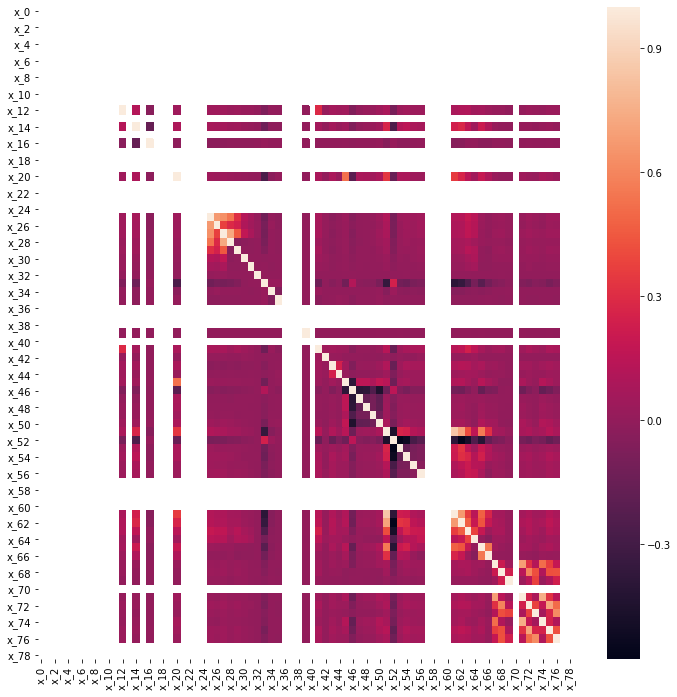

In [15]:
tmp = tmp.loc[tmp["x_0"] != -999, :].reset_index(drop=True)

_, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(tmp.corr(), ax=ax)

del tmp
gc.collect()

#### ncloseCreditCard

7988

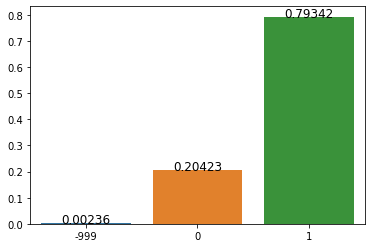

In [16]:
tmp = train_feature["ncloseCreditCard"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### unpayIndvLoan

2503

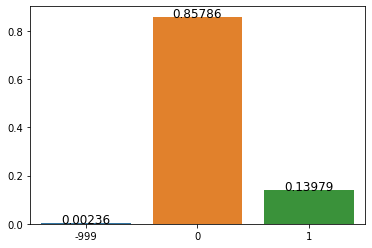

In [17]:
tmp = train_feature["unpayIndvLoan"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### unpayOtherLoan

2271

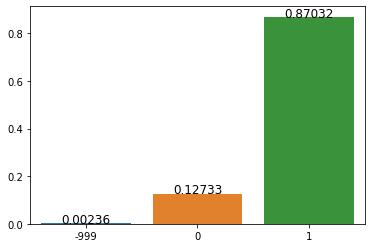

In [18]:
tmp = train_feature["unpayOtherLoan"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### unpayNormalLoan

2271

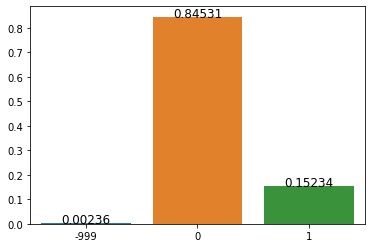

In [19]:
tmp = train_feature["unpayNormalLoan"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### 5yearBadloan

2518

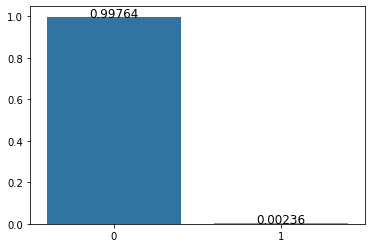

In [20]:
tmp = train_feature["5yearBadloan"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

### 借贷相关

#### loanProduct 产品类型

2154

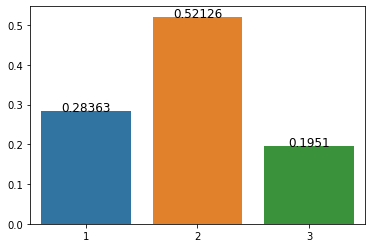

In [21]:
tmp = train_feature["loanProduct"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### residentAddr 居住地

310105 上海市长宁区

2349

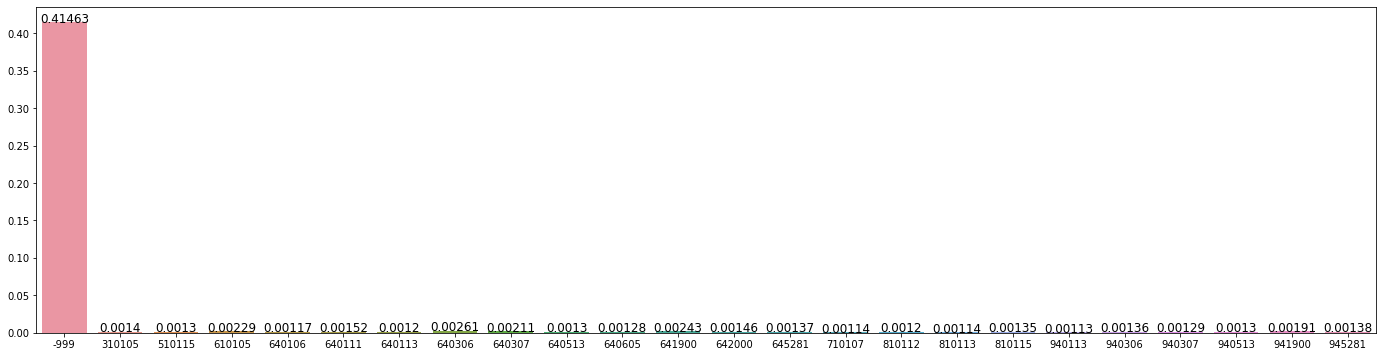

In [22]:
tmp = train_feature["residentAddr"].value_counts(normalize=True)
tmp = tmp.head(24)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### lmt 预授信金额

0.16699999999999998 99.63


14

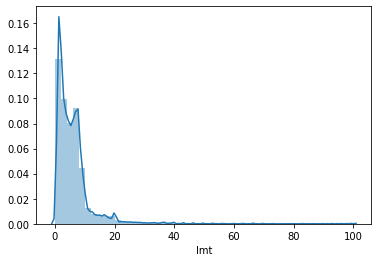

In [23]:
tmp = train_feature["lmt"]

sns.distplot(tmp)

print(tmp.min(), tmp.max())

del tmp
gc.collect()

#### linkRela 联系人关系

12129

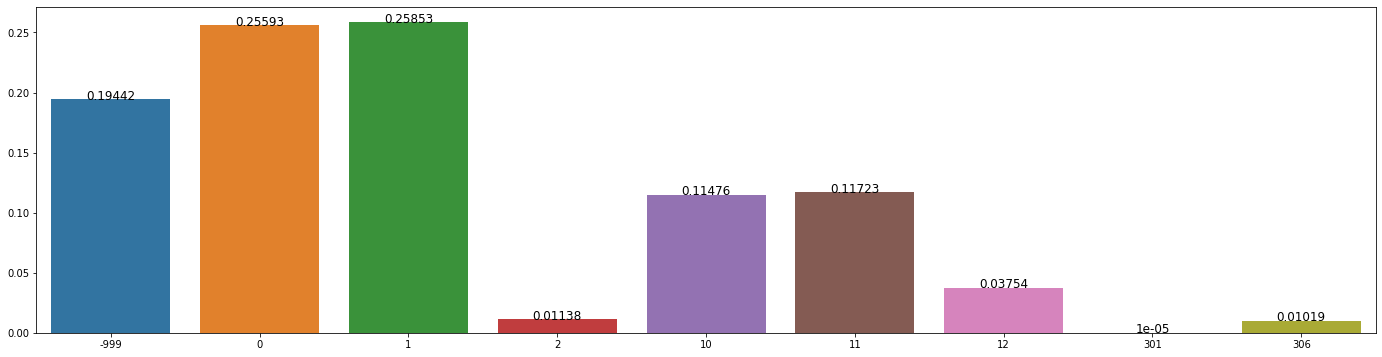

In [24]:
tmp = train_feature["linkRela"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### basicLevel 基础评级

3439

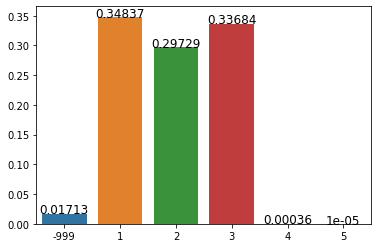

In [25]:
tmp = train_feature["basicLevel"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### setupHour 申请时段

22:00 ~ 9:00 申请贷后行为

2990

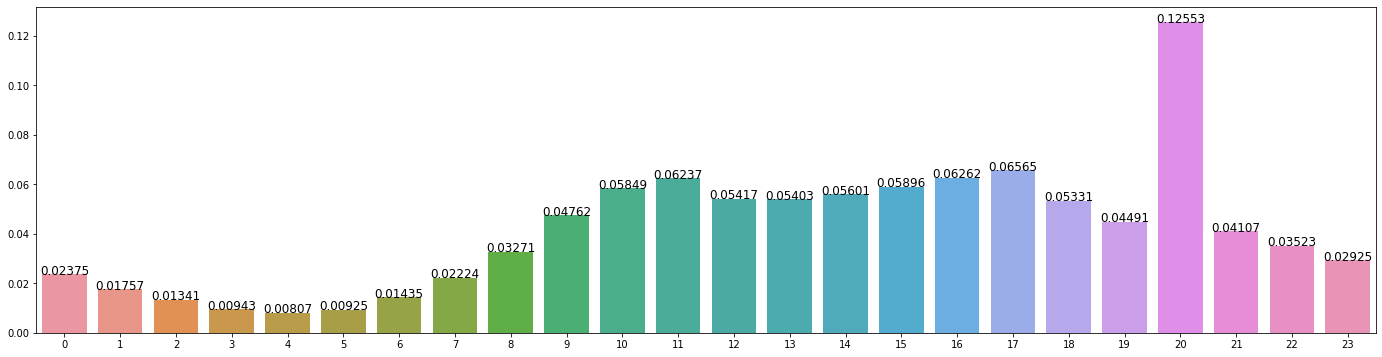

In [26]:
tmp = train_feature["setupHour"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### bankCard 放款卡号 

存在 np.nan 与 -999，厦门国际银行 623623

6091

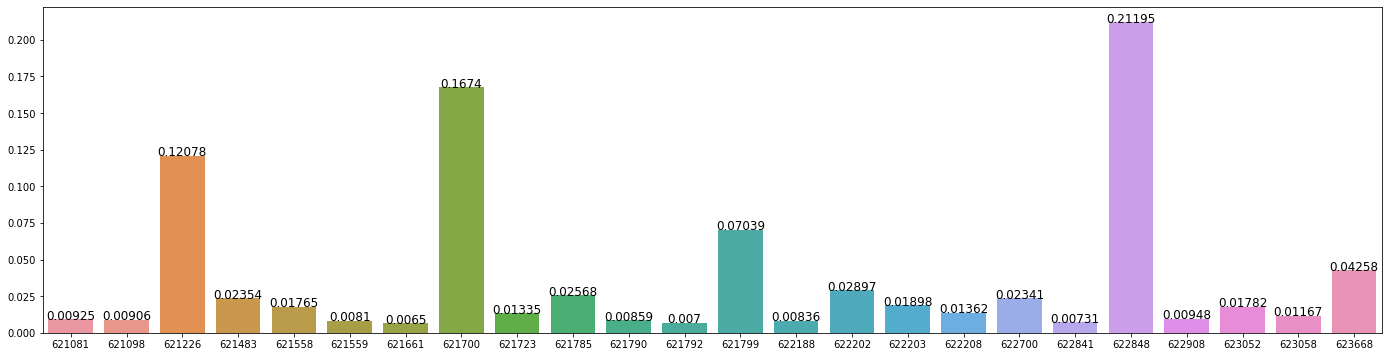

In [27]:
tmp = train_feature["bankCard"].replace({-999: np.nan}).dropna().reset_index(drop=True)
tmp = tmp.apply(lambda element: int(str(element)[:6]))
tmp = tmp.value_counts(normalize=True)
tmp = tmp.head(24)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### weekday 申请日（周几）

6178

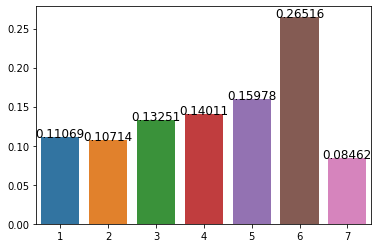

In [28]:
tmp = train_feature["weekday"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### isNew 是否新增数据

3044

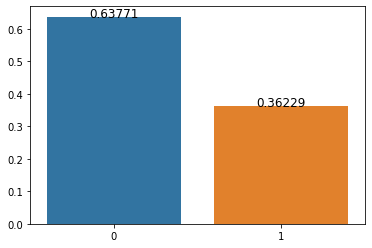

In [29]:
tmp = train_feature["isNew"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

### 基本信息

#### age 年龄

age min 18 age max 117


10

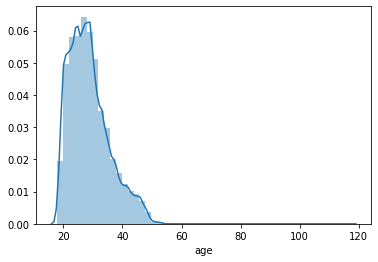

In [30]:
tmp = train_feature["age"]

sns.distplot(tmp)

print("age min {0} age max {1}".format(tmp.min(), tmp.max()))

del tmp
gc.collect()

#### gender 性别

8039

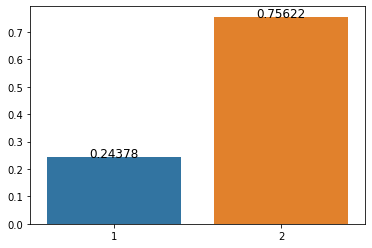

In [31]:
tmp = train_feature["gender"].value_counts(normalize=True)

_, ax = plt.subplots()
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### ethnic 民族

2285

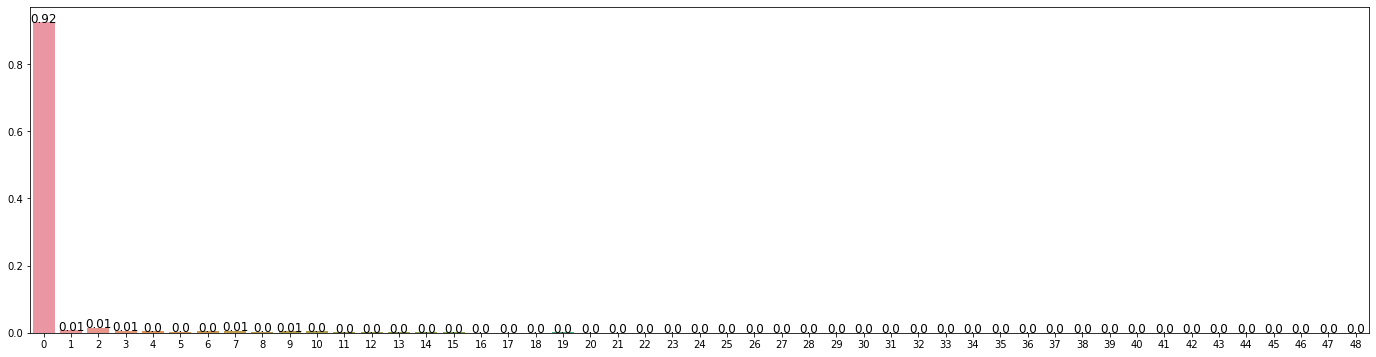

In [32]:
tmp = train_feature["ethnic"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 2), ha="center", fontsize=12)

del tmp
gc.collect()

#### edu 学历

10351

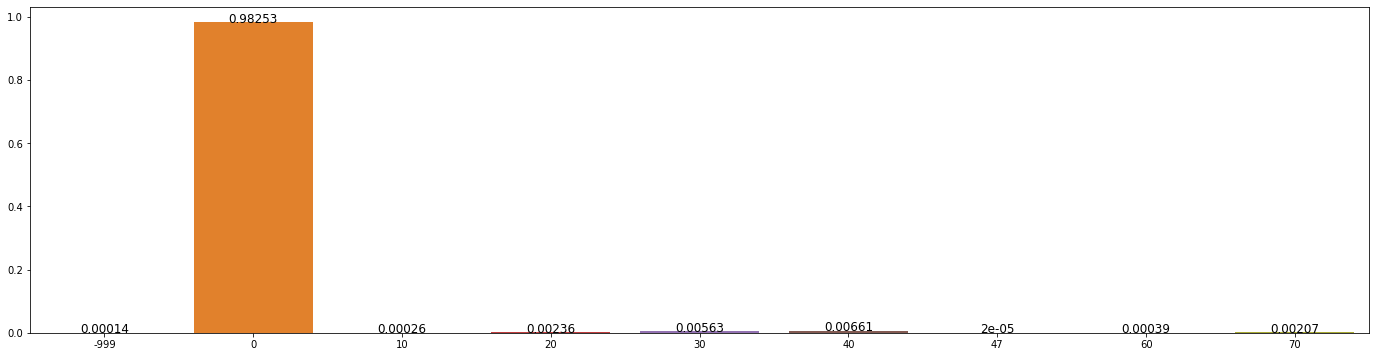

In [33]:
tmp = train_feature["edu"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### highestEdu 学历

3394

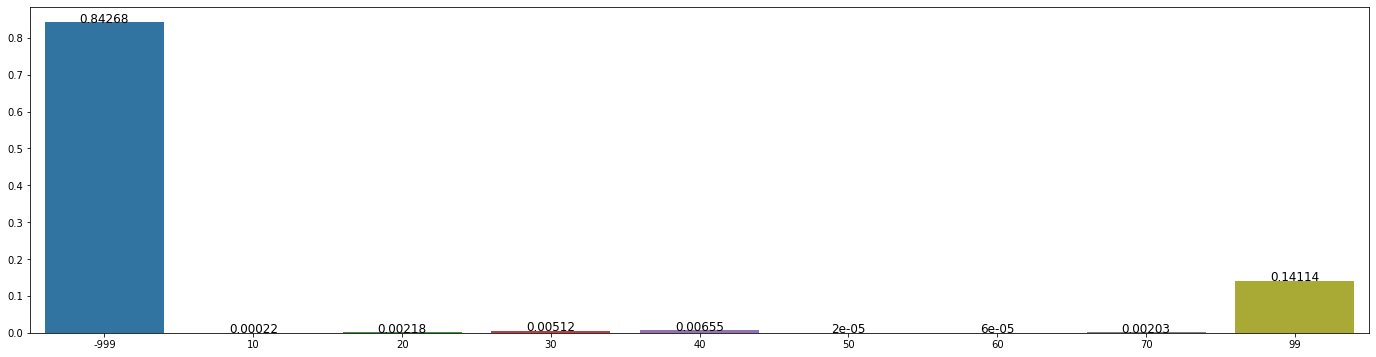

In [34]:
tmp = train_feature["highestEdu"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### job 单位类型

3573

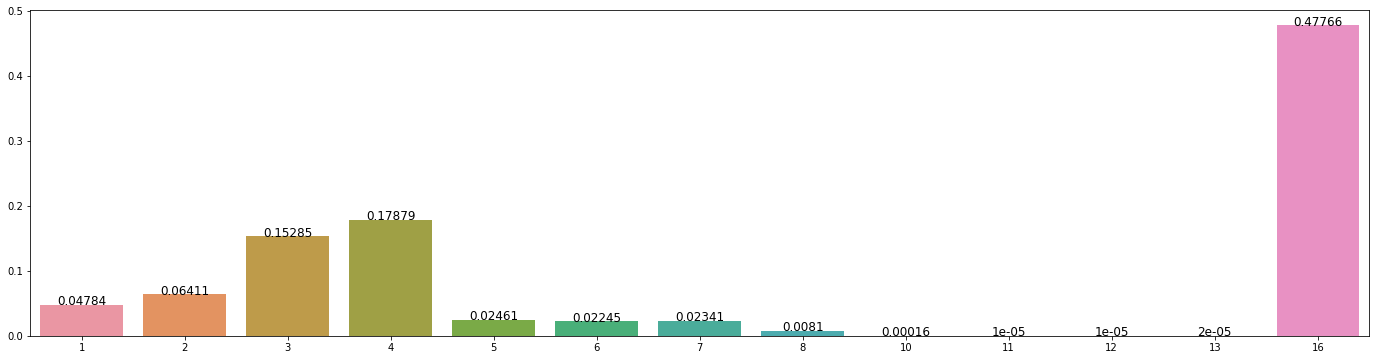

In [35]:
tmp = train_feature["job"].value_counts(normalize=True)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### dist 地区

3738


4099

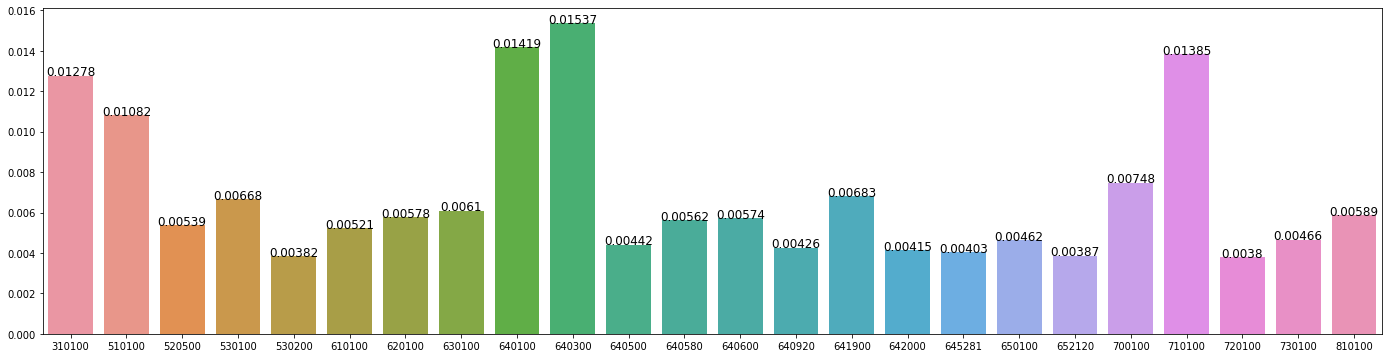

In [36]:
tmp = train_feature["dist"].value_counts(normalize=True)
print(len(tmp))

tmp = tmp.head(24)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### certId 身份证

4033


6198

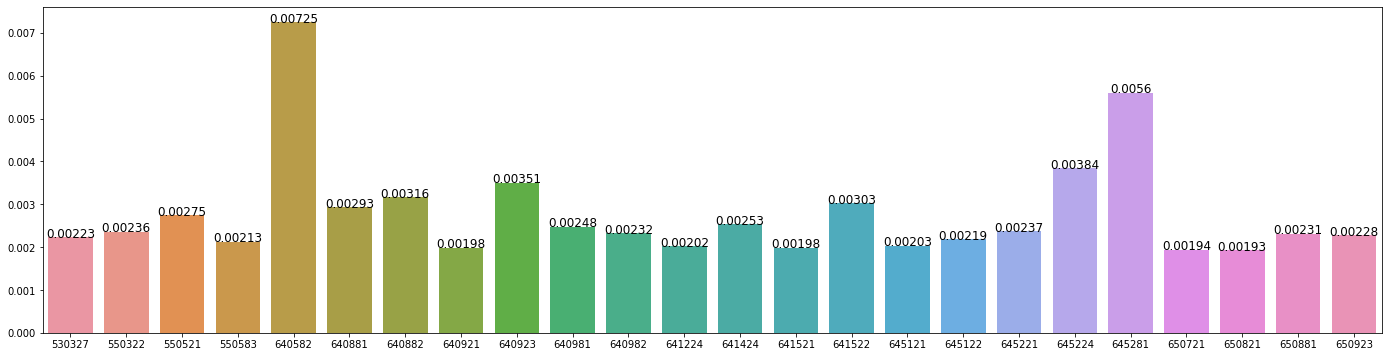

In [37]:
tmp = train_feature["certId"].value_counts(normalize=True)
print(len(tmp))

tmp = tmp.head(24)

_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x=tmp.index.tolist(), y=tmp.values, ci=None, ax=ax)
for i, j in enumerate(tmp.sort_index()):
    ax.text(i, j, round(j, 5), ha="center", fontsize=12)

del tmp
gc.collect()

#### certValidBegin 证件号起始日

使用 pd.to_datetime(unit=), 相关单位不能够成功映射 

In [38]:
train_feature["certValidBegin"].head().append(train_feature["certValidBegin"].tail())

0         3637094400
1         3739996800
2         3347913600
3         3713385600
4         3652214400
132024    3666124800
132025    3717014400
132026    3709497600
132027    3759177600
132028    3611347200
Name: certValidBegin, dtype: int64

#### certValidStop 证件号失效日

使用 pd.to_datetime(unit=), 相关单位不能够成功映射 

In [39]:
train_feature["certValidStop"].head().append(train_feature["certValidStop"].tail())

0         3.952714e+09
1         4.371149e+09
2         3.979066e+09
3         4.344538e+09
4         3.967834e+09
132024    3.981744e+09
132025    4.348166e+09
132026    4.340650e+09
132027    2.560000e+11
132028    3.926966e+09
Name: certValidStop, dtype: float64

## summary

### certId 身份证 && dist 地区 && residentAddr 居住地

In [40]:
train_feature[["certId", "dist", "residentAddr"]].head().append(
    train_feature[["certId", "dist", "residentAddr"]].tail())

,certId,dist,residentAddr
0,640582,640500,640513
1,621023,640600,621023
2,641283,641200,641204
3,340821,340821,-999
4,732628,732628,732628
132024,631023,631023,-999
132025,640711,640700,940703
132026,550424,550424,850424
132027,430104,430100,730103
132028,520723,520723,820723


### certValidBegin 证件号起始时间 && certValidStop 证件号失效时间

In [41]:
((train_feature["certValidStop"] - train_feature["certValidBegin"]) / (365 * 24)).unique()

array([3.60295890e+04, 7.20493151e+04, 3.60197260e+04, 2.87999898e+07,
       2.87958177e+07, 3.59309589e+04, 3.07785205e+05, 2.94519452e+05,
       1.80098630e+04, 2.87954133e+07, 2.87948216e+07, 2.88021202e+07,
       2.87955021e+07, 2.88043098e+07, 2.87976226e+07, 2.87996544e+07,
       2.87952259e+07, 2.87950780e+07, 2.88040632e+07, 2.87944763e+07,
       2.87961728e+07, 2.93109041e+05, 7.19408219e+04, 2.88031459e+07,
       2.87957881e+07, 2.95643836e+05, 1.80197260e+04, 7.18619178e+04,
       2.88011043e+07, 2.88048818e+07, 2.88071109e+07, 2.87986089e+07,
       2.87934703e+07, 2.88022681e+07, 2.88104150e+07, 2.87954331e+07,
       2.87946637e+07, 2.88009958e+07, 3.30213699e+04, 3.59112329e+04,
       2.87949892e+07, 3.59408219e+04, 2.88038561e+07, 2.88018440e+07,
       2.88010057e+07, 9.00591781e+04, 5.40394521e+04, 2.88075054e+07,
       2.88013114e+07, 2.87984610e+07, 2.87995065e+07, 2.93720548e+05,
       2.87959558e+07, 2.87951668e+07, 2.88000588e+07, 2.94134795e+05,
      

### x_0 ~ x_78 && ncloseCreditCard && unpayIndvLoan && unpayOtherLoan && unpayNormalLoan

In [42]:
train_feature.loc[train_feature["x_0"] == -999, 
                  ["x_" + str(i) for i in range(79)] + ["ncloseCreditCard", "unpayIndvLoan", "unpayOtherLoan", "unpayNormalLoan"]]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan
179,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
231,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
386,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
508,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
733,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
951,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1580,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1765,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1782,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-99